# 📌 프로젝트 배경

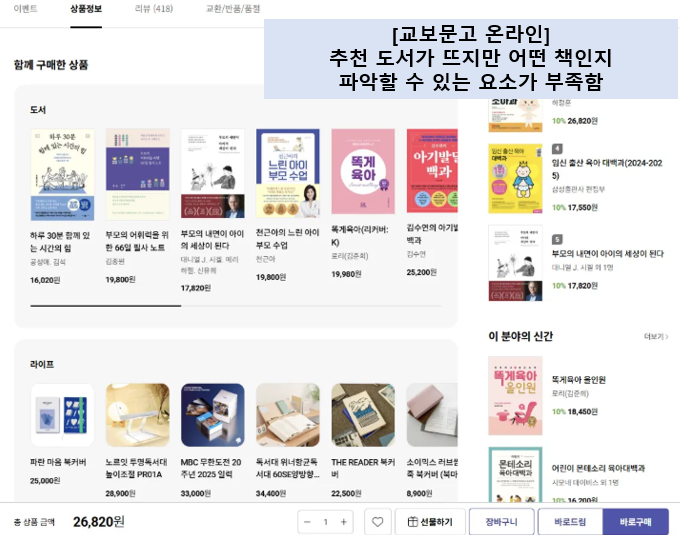

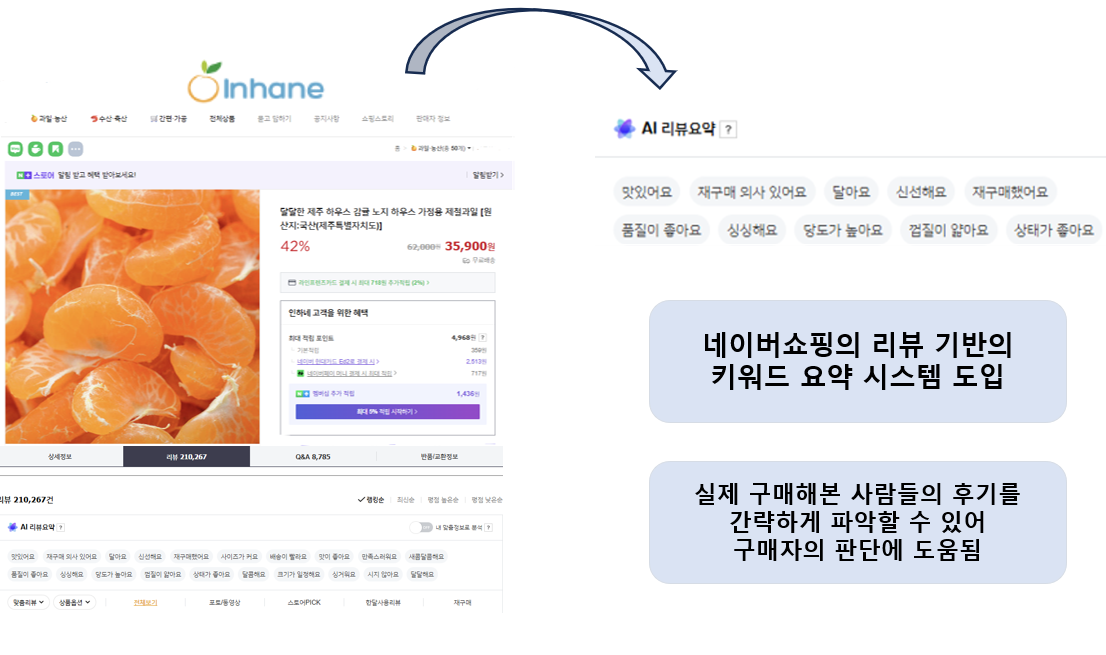

- **본 프로젝트의 기대효과**
    - **탐색 효율 향상**: 사용자는 자신이 원하는 특성(예: ‘감동적’, ‘실용적’, ‘쉽게 읽힘’ 등)에 맞춰 도서를 쉽게 찾을 수 있음
    - **리뷰 신뢰도 및 다양성 강화**: 리뷰 키워드는 실제 구매자들이 자주 언급한 단어와 경험을 기반으로 추출되므로, 신뢰할 수 있는 정보로 작용할 것
    - **쇼핑몰 차별화 :** 상품의 특장점을 한눈에 보여줄 수 있어 리뷰의 양과 질을 모두 높이고, 구매 전환율을 높이는 효과

# 📌 프로젝트 개요

## 목표

**도서 간의 콘텐츠 기반 유사도**와 **사용자 기반 협업 필터링**을 결합

* 사용자에게 관련성 높은 도서를 추천
* 해당 사용자가 그 도서에 **어떤 평점을 줄지까지 예측**하는 하이브리드 추천 시스템을 구현

--- 

## 추천 방식

1. 사용자가 구매한 도서 **A**,
2. 도서 A와 콘텐츠적으로 유사한 도서를 찾고,
3. 각 도서에 대해 해당 사용자가 줄 것으로 예상되는 평점(협업 필터링 기반)을 계산.
4. 콘텐츠 유사도와 예측 평점을 결합하여 최종 추천 점수를 계산하고,
5. 가장 점수가 높은 도서들을 Top-N으로 추천되고,
6. 각 추천되는 도서에는 리뷰 기반의 키워드들이 함께 제시


- 추천 점수 계산 방식

```
최종점수 = α * 콘텐츠 유사도 + (1 - α) * (예측 평점 / 최대 평점)
```


## 📌 프로젝트 수행 요약
### 1. 데이터 전처리
- 교보문고 2024년 분야별 베스트셀러 30권 데이터를 수집
- 각 도서별로 온라인에서 리뷰와 평점 데이터를 크롤링하여 확보
- 도서 ID(예: bookId, 판매상품ID)를 기준으로 베스트셀러 데이터와 리뷰/평점 데이터를 병합
- 병합된 데이터의 중복 제거 등 기본적인 전처리 수행

---

### 2. 텍스트 마이닝
- 도서별로 리뷰를 합친 뒤, 표제어 추출 및 불용어 제거 등 텍스트 전처리를 진행
- 각 도서별로 가장 많이 등장하는 대표 키워드(상위 N개)를 추출

---

### 3. 추천시스템 구현
- 협업 필터링(마스킹된 유저아이디-해당 유저의 도서 평점)과 내용 기반 필터링(도서 분야, 키워드 등)을 결합한 하이브리드 추천시스템을 구축
- 추천 결과로 관련 도서 리스트를 제시하고,  
  각 추천 도서의 대표 키워드를 함께 표시하여 사용자가 도서의 특징을 한눈에 파악할 수 있도록 함


# 1. 2024년 연간 베스트셀러 분야별 병합 및 추출
- 교보문고 사이트에서 엑셀 파일로 다운

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
os.listdir('./book')

['교보문고_종합_베스트셀러_상품리스트_가정생활.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_건강.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_경제경영.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_과학.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_기술컴퓨터.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_만화.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_소설.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_시.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_아동.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_아동만화.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_에세이.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_여행.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_역사문화.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_예술.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_외국소설.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_외국어.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_요리.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_유아.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_인문.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_자기계발.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_정치사회.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_종교.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_청소년.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_취미스포츠.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_토익토플.xlsx',
 '교보문고_종합_베스트셀러_상품리스트_한국소설.xlsx']

In [2]:
df_list = []

for folder in os.listdir('./book'):
    df_tmp = pd.read_excel(f'./book/{folder}')
    df_list.append(df_tmp)

df2 = pd.concat(df_list, axis=0, ignore_index=True)
df2 = df2.drop_duplicates().reset_index(drop=True)
df2.columns = ['순위', '상품코드', '판매상품ID', '상품명', '정가', '판매가', '할인율', '적립율', '적립예정포인트',
       '인물', '출판사', '발행일자', '분야']

df2.columns = ['순위', '상품코드', '판매상품ID', '상품명', '정가', '판매가', '할인율', '적립율', '적립예정포인트',
       '인물', '출판사', '발행일자', '분야']
df2['발행일자'] = pd.to_datetime(df2['발행일자'] , format='%Y%m%d')
df2[['정가', '판매가', '적립예정포인트']]= df2[['정가', '판매가', '적립예정포인트']].apply(lambda col: col.str.replace(',', '', regex=False).astype(float))

print()
print(df2.shape)
display(df2.head())


(778, 13)


,순위,상품코드,판매상품ID,상품명,정가,판매가,할인율,적립율,적립예정포인트,인물,출판사,발행일자,분야
0,1,9791193506202,S000212053843,아이는 무엇으로 자라는가,17500.0,15750.0,10%,5%,870.0,버지니아 사티어,포레스트북스,2023-12-18,가정/육아
1,2,9788915999008,S000213747758,임신 출산 육아 대백과(2024-2025),19500.0,17550.0,10%,5%,970.0,삼성출판사 편집부,삼성출판사,2024-07-15,가정/육아
2,3,9788934965404,S000212675550,국어 잘하는 아이가 이깁니다,17500.0,15750.0,10%,5%,870.0,나민애,김영사,2024-03-15,가정/육아
3,4,9791195795505,S000001967750,삐뽀삐뽀 119 소아과,29800.0,26820.0,10%,5%,1490.0,하정훈,유니책방,2024-01-05,가정/육아
4,5,9791198752406,S000213259785,나는 다정한 관찰자가 되기로 했다,17800.0,16020.0,10%,5%,890.0,이은경,서교책방,2024-05-30,가정/육아


In [3]:
for col in df2.columns:
    if any(keyword in col for keyword in ['상품코드', '판매상품ID']):
        continue
    print(col)
    print(df2[col].unique())

순위
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
상품명
['아이는 무엇으로 자라는가' '임신 출산 육아 대백과(2024-2025)' '국어 잘하는 아이가 이깁니다'
 '삐뽀삐뽀 119 소아과' '나는 다정한 관찰자가 되기로 했다' '최민준의 아들코칭 백과' '똑게육아(리커버:K)'
 '부모의 어휘력' '세상에서 제일 재밌는 종이접기' '우리동네 어린이병원 육아대백과' '어떻게 말해줘야 할까'
 '영혼이 강한 아이로 키워라' '4~7세 보고 만지는 수학은 이렇게 가르칩니다' 'SKY 로드맵' '기적의 서울대 쌍둥이 공부법'
 '엄마 나는 자라고 있어요' '아기 발달 백과' '첫 1년 움직임의 비밀' '하루 한 장 임신 출산 데일리북'
 '조선미의 초등생활 상담소' '4~7세보다 중요한 시기는 없습니다(15만 부 기념 에디션)' '세줄쓰기'
 '조선미의 현실 육아 상담소' '마음이 부자인 아이는 어떻게 성장하는가' '66일 자존감 대화법' '엄마의 말 그릇' '베싸육아'
 '작은 변화에도 걱정이 많아지는 예비 엄마들에게' '내 아이를 위한 감정코칭' '성적을 부탁해 티처스' '내 몸 혁명'
 '느리게 나이 드는 습관' '저속노화 식사법' '백년허리 2: 치료편' '아무도 늙지 않는 세상' '백년허리 1: 진단편'
 '백년운동' '해독 혁명' '3분만 바라보면 눈이 젊어진다' '의학의 대가들' '완전배출'
 '건강과 다이어트를 동시에 잡는 7대 3의 법칙 채소·과일식(10만 부 기념 스페셜 에디션)' '지방 대사 켜는 스위치온 다이어트'
 '세상에서 가장 알기 쉬운 근육연결도감' '다니엘스의 러닝 포뮬러' '글루코스 혁명' '놓아버림' '백년목 1' '백년목 2'
 '내장비만' '다이어트 사이언스(2022)' '양선수의 온라인 PT' '병에 걸려도 잘 사는 법' '환자 혁명' '염증 해방'
 '느리게 나이 드는 기억력의 비밀' '의사들도 모르는

- 동일한 도서명이지만 서로 다른 책인 경우가 존재함

In [12]:
print('상품명은 키값으로 쓸 수 없고, 판매상품 ID는 키값으로 쓸 수 있음')
print('책 제목이 같지만 서로 다른 책인 경우가 있어 판매상품ID를 유니크한 값으로써 사용해야 하고 상품명의 경우 유니크값으로 사용할 수 없음')
print('--->')
print('도서 ID 고유값 개수 : ',df2['판매상품ID'].nunique(),'도서 타이틀 고유값 개수 : ' ,df2['상품명'].nunique())

상품명은 키값으로 쓸 수 없고, 판매상품 ID는 키값으로 쓸 수 있음
책 제목이 같지만 서로 다른 책인 경우가 있어 판매상품ID를 유니크한 값으로써 사용해야 하고 상품명의 경우 유니크값으로 사용할 수 없음
--->
도서 ID 고유값 개수 :  748 도서 타이틀 고유값 개수 :  747


In [16]:
# (1) 상품ID → 상품명: 하나의 상품ID에 여러 상품명이 있는가?
print('판매상품ID별 최대유니크값',df2.groupby('상품명')['판매상품ID'].nunique().max())

display(df2.groupby('상품명')['판매상품ID'].nunique()[df2.groupby('상품명')['판매상품ID'].nunique()==df2.groupby('상품명')['판매상품ID'].nunique().max()])

display(df2[df2['상품명']=='종의 기원'])

#df2.to_csv('2024_books.csv', index=False)

판매상품ID별 최대유니크값 2


상품명
종의 기원    2
Name: 판매상품ID, dtype: int64

,순위,상품코드,판매상품ID,상품명,정가,판매가,할인율,적립율,적립예정포인트,인물,출판사,발행일자,분야
103,14,9791189198862,S000001923922,종의 기원,22000.0,19800.0,10%,5%,1100.0,찰스 다윈 외,사이언스북스,2019-07-31,과학
770,23,9788956609959,S000000828491,종의 기원,16800.0,15120.0,10%,5%,840.0,정유정,은행나무,2016-05-16,소설


# 2. 도서별 리뷰 크롤링
- 미니 프로젝트 시간 상, 각 도서는 베스트셀로로 리뷰 수가 최대 1112건으로 모든 분야의 베스트셀러 리뷰를 크롤링하기에는 한계 존재
- 최대한 1명의 사용자가 많은 리뷰를 달았을 법한 분야들을 선정
- 대상은 30 ~ 40대의 어린 자녀를 양육하는 부모로 분야는 **총 5개 가정/육아, 어린이(초등), 유아(0~7세), 청소년, 요리**를 선정함

In [21]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller
import pandas as pd
book = pd.read_csv('2024_books.csv')
book.shape

(778, 13)

In [28]:
bold = '\033[1m'
reset = '\033[0m'

book_list = book['분야'].unique()
family_list =  ['가정/육아','어린이(초등)','유아(0~7세)','청소년', '요리']

book_list = set(book_list) - set(family_list)
print("도서 분야 : ",book['분야'].unique())
print(f"사용한 컬럼 : {bold}{family_list}{reset}")

도서 분야 :  ['가정/육아' '건강' '경제/경영' '과학' '컴퓨터/IT' '기술/공학' '만화' '소설' '시/에세이' '어린이(초등)'
 '여행' '역사/문화' '예술/대중문화' '외국어' '요리' '유아(0~7세)' '인문' '자기계발' '정치/사회' '종교'
 '청소년' '취미/실용/스포츠']
사용한 컬럼 : ['가정/육아', '어린이(초등)', '유아(0~7세)', '청소년', '요리']


- '가정/육아','어린이(초등)' : 은진이 크롤링
- '유아(0~7세)','청소년', '요리' : 다은이 크롤링

In [35]:
print(f'{bold}[크롤링한 분야별 도서 권수]{reset}')
book_ids = book['판매상품ID'].copy()
family_bookid = book[book['분야'].isin(family_list)][['판매상품ID','분야']]
pd.DataFrame(family_bookid.groupby('분야')['분야'].value_counts())

[크롤링한 분야별 도서 권수]


,count
분야,
가정/육아,30
어린이(초등),60
요리,30
유아(0~7세),30
청소년,29


## 크롤링 자동화 코드

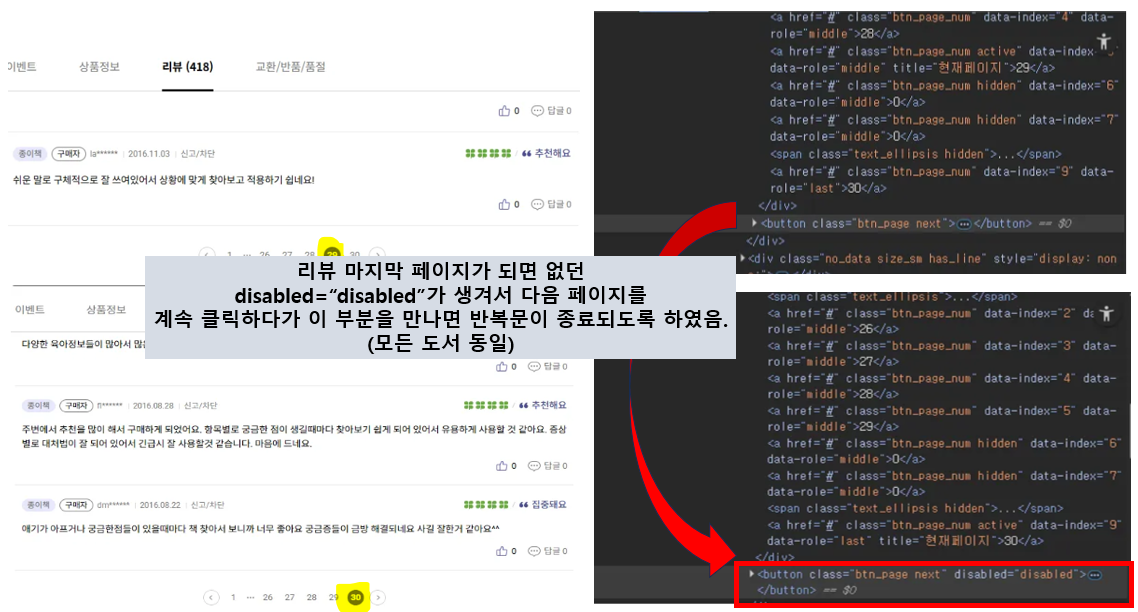

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from chromedriver_autoinstaller import install as install_chromedriver
from bs4 import BeautifulSoup
import time
import re
import pandas as pd

install_chromedriver()
data = []

def crawl_reviews(bookid):
    driver = webdriver.Chrome()  # 각 책마다 새 드라이버 생성
    try:
        url = f"https://product.kyobobook.co.kr/detail/{bookid}"
        driver.get(url)
        time.sleep(3)

        # 리뷰 탭 클릭
        try:
            review_tab = driver.find_element(By.XPATH, '//*[@id="contents"]/div[2]/div[1]/div/div[1]/ul/li[3]/a/span')
            driver.execute_script("arguments[0].click();", review_tab)
            time.sleep(2)
        except Exception as e:
            pass

        page = 1
        while True:
            print(f"{bookid} 크롤링 중: {page}페이지")
            time.sleep(2)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            comments = soup.select('div.comment_item')
            if not comments:
                break

            for comment in comments:
                review = comment.select_one(".comment_text")
                review_text = review.text.strip() if review else None

                rating = comment.select_one(".caption-badge")
                rating_text = rating.text.strip() if rating else None

                score = None
                if rating_text:
                    all_scores = re.findall(r'(\d+(\.\d+)?)점', rating_text)
                    if all_scores:
                        score = float(all_scores[-1][0])

                userid = comment.select_one(".info_item")
                userid_text = userid.text.strip() if userid else None

                data.append({'userId': userid_text, 'review': review_text, '평점': score, 'bookId': bookid})

            # 다음 페이지 버튼
            try:
                next_btn = driver.find_element(By.XPATH, '//*[@id="ReviewList1"]/div[3]/div[2]/div/div[2]/button[2]')
                if next_btn.get_attribute("disabled"):
                    print("마지막 페이지까지 크롤링 완료!")
                    break
                else:
                    driver.execute_script("arguments[0].click();", next_btn)
                    time.sleep(2)
                    page += 1
            except Exception as e:
                print("다음 페이지 버튼 오류:", e)
                break

    except Exception as e:
        print(f"{bookid} 크롤링 중 오류 발생:", e)
    finally:
        driver.quit()  # 각 책 처리 후 드라이버 종료


for bookid in family_bookid['판매상품ID']:
    crawl_reviews(bookid)

# DataFrame 생성
review_eunjin = pd.DataFrame(data)
print(review_eunjin.head())

S000212053843 크롤링 중: 1페이지
S000212053843 크롤링 중: 2페이지
S000212053843 크롤링 중: 3페이지
S000212053843 크롤링 중: 4페이지
S000212053843 크롤링 중: 5페이지
S000212053843 크롤링 중: 6페이지
S000212053843 크롤링 중: 7페이지
S000212053843 크롤링 중: 8페이지
S000212053843 크롤링 중: 9페이지
S000212053843 크롤링 중: 10페이지
S000212053843 크롤링 중: 11페이지
S000212053843 크롤링 중: 12페이지
S000212053843 크롤링 중: 13페이지
S000212053843 크롤링 중: 14페이지
마지막 페이지까지 크롤링 완료!
S000213747758 크롤링 중: 1페이지
S000213747758 크롤링 중: 2페이지
S000213747758 크롤링 중: 3페이지
S000213747758 크롤링 중: 4페이지
S000213747758 크롤링 중: 5페이지
S000213747758 크롤링 중: 6페이지
마지막 페이지까지 크롤링 완료!
S000212675550 크롤링 중: 1페이지
S000212675550 크롤링 중: 2페이지
S000212675550 크롤링 중: 3페이지
S000212675550 크롤링 중: 4페이지
S000212675550 크롤링 중: 5페이지
S000212675550 크롤링 중: 6페이지
S000212675550 크롤링 중: 7페이지
S000212675550 크롤링 중: 8페이지
S000212675550 크롤링 중: 9페이지
S000212675550 크롤링 중: 10페이지
S000212675550 크롤링 중: 11페이지
S000212675550 크롤링 중: 12페이지
S000212675550 크롤링 중: 13페이지
S000212675550 크롤링 중: 14페이지
S000212675550 크롤링 중: 15페이지
S000212675550 크롤링 중: 16페이지
S000212675550 크롤

In [ ]:
review_eunjin.shape, review.shape

In [ ]:
review_eunjin.to_csv('family_book_reviews_eunjin.csv', index=False)